# Import the libraries

In [76]:
from preprocessing_multi_CNN import Train_Validation_Test_Split

import numpy as np
import pandas as pd

import pickle as pk

import os
import shutil

import cv2 
import matplotlib.pyplot as plt
%matplotlib inline 

from keras import layers
from keras import models
from keras.callbacks import EarlyStopping, ModelCheckpoint

from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model

# Data pre-processing

## Train-Validation-Test Split

In [78]:
c_train, d_train, w_train, \
c_val, d_val, w_val, \
c_test, d_test, w_test = Train_Validation_Test_Split('cats', 'dogs', 'wilds')

Final number of cat pictures: 5000
Final number of dog pictures: 5000
Final number of wild pictures: 5000

-----------------------------------------------------------------

Start to determine test, validation and train part
Stop to determine test, validation and train part

Start to set folder structure
Stop to set folder structure

Start copying the determined images to the appropriate folders
Stop copying the determined images to the appropriate folders

-----------------------------------------------------------------

          The final data breakdown is as follows:

Total training cat images: 3000
Total training dog images: 3000
Total training wild images: 3000

Total validation cat images: 1000
Total validation dog images: 1000
Total validation wild images: 1000

Total test cat images: 1000
Total test dog images: 1000
Total test wild images: 1000


I have chosen the percentage distribution as follows:

+ Trainings Part: 60%
+ Validation Part: 20%
+ Testing Part: 20%


## Obtaining the lists of randomly selected images

In [3]:
list_cats_training = c_train
list_dogs_training = d_train
list_wilds_training = w_train

list_cats_validation = c_val
list_dogs_validation = d_val
list_wilds_validation = w_val

list_cats_test = c_test
list_dogs_test = d_test
list_wilds_test = w_test

## Determination of the directories

In [4]:
root_directory = os.getcwd()

train_dir = os.path.join(root_directory, 'animals\\train')
validation_dir = os.path.join(root_directory, 'animals\\validation')
test_dir = os.path.join(root_directory, 'animals\\test')

## Obtain the total number of training, validation and test images

In [5]:
num_cats_img_train = len(list_cats_training)
num_dogs_img_train = len(list_dogs_training)
num_wilds_img_train = len(list_wilds_training)

num_train_images_total = num_cats_img_train + num_dogs_img_train + num_wilds_img_train

print('Total training cat images: ' + str(num_cats_img_train))
print('Total training dog images: ' + str(num_dogs_img_train))
print('Total training wild images: ' + str(num_wilds_img_train))
print()
print('Total training images: ' + str(num_train_images_total))

Total training cat images: 3000
Total training dog images: 3000
Total training wild images: 3000

Total training images: 9000


In [6]:
num_cats_img_validation = len(list_cats_validation)
num_dogs_img_validation = len(list_dogs_validation)
num_wilds_img_validation = len(list_wilds_validation)

num_validation_images_total = num_cats_img_validation + num_dogs_img_validation + num_wilds_img_validation

print('Total validation cat images: ' + str(num_cats_img_validation))
print('Total validation dog images: ' + str(num_dogs_img_validation))
print('Total validation wild images: ' + str(num_wilds_img_validation))
print()
print('Total validation images: ' + str(num_validation_images_total))

Total validation cat images: 1000
Total validation dog images: 1000
Total validation wild images: 1000

Total validation images: 3000


In [7]:
num_cats_img_test = len(list_cats_test)
num_dogs_img_test = len(list_dogs_test)
num_wilds_img_test = len(list_wilds_test)

num_test_images_total = num_cats_img_test + num_dogs_img_test + num_wilds_img_test

print('Total test cat images: ' + str(num_cats_img_test))
print('Total test dog images: ' + str(num_dogs_img_test))
print('Total test wild images: ' + str(num_wilds_img_test))
print()
print('Total test images: ' + str(num_test_images_total))

Total test cat images: 1000
Total test dog images: 1000
Total test wild images: 1000

Total test images: 3000


# CNN with Data Augmentation

## Name Definitions

In [8]:
checkpoint_no = 'ckpt_1_CNN_with_augm'
model_name = 'Animals_CNN_4_Conv_F32_64_128_128_epoch_60_es'

## Parameter Settings

In [9]:
img_height = 150
img_width = 150
input_shape = (img_height, img_width, 3)

n_batch_size = 32

n_steps_per_epoch = int(num_train_images_total / n_batch_size)
n_validation_steps = int(num_validation_images_total / n_batch_size)
n_test_steps = int(num_test_images_total / n_batch_size)

n_epochs = 60

num_classes = len(os.listdir(train_dir))

print('Input Shape: '+'('+str(img_height)+', '+str(img_width)+', ' + str(3)+')')
print('Batch Size: ' + str(n_batch_size))
print()
print('Steps per Epoch: ' + str(n_steps_per_epoch))
print()
print('Validation Steps: ' + str(n_validation_steps))
print('Test Steps: ' + str(n_test_steps))
print()
print('Number of Epochs: ' + str(n_epochs))
print()
print('Number of Classes: ' + str(num_classes))

Input Shape: (150, 150, 3)
Batch Size: 32

Steps per Epoch: 281

Validation Steps: 93
Test Steps: 93

Number of Epochs: 60

Number of Classes: 3


## Instantiating a CNN with Data Augmentation

### Layer Structure

In [10]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=input_shape))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dropout(0.5))

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

### Configuring the model for training

In [12]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

### Using ImageDataGenerator with data augmentation

In [13]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

validation_datagen = ImageDataGenerator(rescale=1./255)



train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_height, img_width),
        batch_size=n_batch_size,
        class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_height, img_width),
        batch_size=n_batch_size,
        class_mode='categorical')

Found 9000 images belonging to 3 classes.
Found 3000 images belonging to 3 classes.


## Callbacks

In [14]:
# Prepare a directory to store all the checkpoints.
checkpoint_dir = './'+ checkpoint_no
if not os.path.exists(checkpoint_dir):
    os.makedirs(checkpoint_dir)

In [15]:
keras_callbacks = [ModelCheckpoint(filepath = checkpoint_dir + '/' + model_name, 
                                   monitor='val_loss', save_best_only=True, mode='auto'),
                   EarlyStopping(monitor='val_loss', patience=7, mode='auto', 
                                 min_delta = 0, verbose=1)]

## Fitting the model

In [16]:
history = model.fit(
      train_generator,
      steps_per_epoch=n_steps_per_epoch,
      epochs=n_epochs,
      validation_data=validation_generator,
      validation_steps=n_validation_steps,
      callbacks=keras_callbacks)

Epoch 1/60
281/281 [==============================] - 168s 594ms/step - loss: 0.9969 - accuracy: 0.4726 - val_loss: 0.5968 - val_accuracy: 0.7530
INFO:tensorflow:Assets written to: ./ckpt_1_CNN_with_augm\Animals_CNN_4_Conv_F32_64_128_128_epoch_60_es\assets
Epoch 2/60
281/281 [==============================] - 126s 450ms/step - loss: 0.6593 - accuracy: 0.7212 - val_loss: 0.3497 - val_accuracy: 0.8619
INFO:tensorflow:Assets written to: ./ckpt_1_CNN_with_augm\Animals_CNN_4_Conv_F32_64_128_128_epoch_60_es\assets
Epoch 3/60
281/281 [==============================] - 119s 424ms/step - loss: 0.4901 - accuracy: 0.8046 - val_loss: 0.2956 - val_accuracy: 0.8851
INFO:tensorflow:Assets written to: ./ckpt_1_CNN_with_augm\Animals_CNN_4_Conv_F32_64_128_128_epoch_60_es\assets
Epoch 4/60
281/281 [==============================] - 125s 444ms/step - loss: 0.4003 - accuracy: 0.8446 - val_loss: 0.1737 - val_accuracy: 0.9368
INFO:tensorflow:Assets written to: ./ckpt_1_CNN_with_augm\Animals_CNN_4_Conv_F32_64

## Obtaining the best model values

In [17]:
hist_df = pd.DataFrame(history.history)
hist_df['epoch'] = hist_df.index + 1
cols = list(hist_df.columns)
cols = [cols[-1]] + cols[:-1]
hist_df = hist_df[cols]
hist_df.to_csv(checkpoint_no + '/' + 'history_df_' + model_name + '.csv')
hist_df.head()

,epoch,loss,accuracy,val_loss,val_accuracy
0,1,0.890314,0.564451,0.596836,0.753024
1,2,0.604209,0.750223,0.349663,0.861895
2,3,0.469119,0.811552,0.295567,0.885081
3,4,0.375080,0.853925,0.173667,0.936828
4,5,0.298234,0.886151,0.172428,0.937500


In [18]:
values_of_best_model = hist_df[hist_df.val_loss == hist_df.val_loss.min()]
values_of_best_model

,epoch,loss,accuracy,val_loss,val_accuracy
15,16,0.137966,0.949487,0.06603,0.978495


## Obtaining class assignments

In [19]:
class_assignment = train_generator.class_indices

df = pd.DataFrame([class_assignment], columns=class_assignment.keys())
df_stacked = df.stack()
df_temp = pd.DataFrame(df_stacked).reset_index().drop(['level_0'], axis=1)
df_temp.columns = ['Category', 'Allocated Number']
df_temp.to_csv(checkpoint_no + '/' + 'class_assignment_df_' + model_name + '.csv')

print('Class assignment:', str(class_assignment))

Class assignment: {'cats': 0, 'dogs': 1, 'wilds': 2}


## Validation

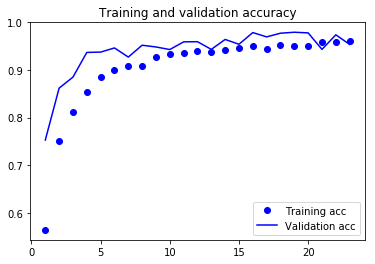

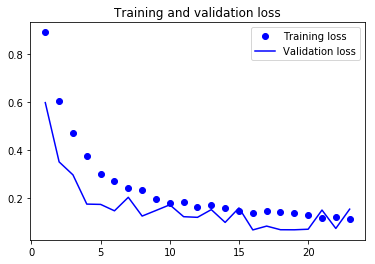

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Load best model

In [21]:
# Loading the automatically saved model
model_reloaded = load_model(checkpoint_no + '/' + model_name)

# Saving the best model in the correct path and format
root_directory = os.getcwd()
checkpoint_dir = os.path.join(root_directory, checkpoint_no)
model_name_temp = os.path.join(checkpoint_dir, model_name + '.h5')
model_reloaded.save(model_name_temp)

# Deletion of the automatically created folder under Model Checkpoint File.
folder_name_temp = os.path.join(checkpoint_dir, model_name)
shutil.rmtree(folder_name_temp, ignore_errors=True)

In [22]:
best_model = load_model(model_name_temp)

## Model Testing

In [23]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_height, img_width),
        batch_size=n_batch_size,
        class_mode='categorical')

test_loss, test_acc = best_model.evaluate(test_generator, steps=n_test_steps)
print()
print('Test Accuracy:', test_acc)

Found 3000 images belonging to 3 classes.
93/93 [==============================] - 20s 214ms/step - loss: 0.0619 - accuracy: 0.9795

Test Accuracy: 0.9795026779174805


In [38]:
pk.dump(img_height, open(checkpoint_dir+ '\\' +'img_height.pkl', 'wb'))
pk.dump(img_width, open(checkpoint_dir+ '\\' +'img_width.pkl', 'wb'))

# Test Predictions

In [65]:
# Load the categories
df = pd.read_csv('ckpt_1_CNN_with_augm/class_assignment_df_Animals_CNN_4_Conv_F32_64_128_128_epoch_60_es.csv')
df = df.sort_values(by='Allocated Number', ascending=True)
CATEGORIES = df['Category'].to_list()

# Load the used image height and width
img_height_reload = pk.load(open("ckpt_1_CNN_with_augm/img_height.pkl",'rb'))
img_width_reload = pk.load(open("ckpt_1_CNN_with_augm/img_width.pkl",'rb'))


print('CATEGORIES : ' + str(CATEGORIES))
print()
print('Used image height: ' + str(img_height_reload))
print('Used image width: ' + str(img_width_reload))

CATEGORIES : ['cats', 'dogs', 'wilds']

Used image height: 150
Used image width: 150


AxesImage(54,36;334.8x217.44)

------------------------------------
Predicted Class: cats
------------------------------------


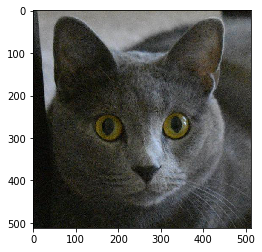

In [66]:
img_pred = cv2.imread('test_pictures/test_cat_pic_1.jpg')

print(plt.imshow(cv2.cvtColor(img_pred, cv2.COLOR_BGR2RGB)))

img_pred = cv2.resize(img_pred,(img_height_reload,img_width_reload))
img_pred = np.reshape(img_pred,[1,img_height,img_width,3])

classes = np.argmax(best_model.predict(img_pred), axis=-1)

print()
print('------------------------------------')
print('Predicted Class: ' + CATEGORIES[int(classes[0])])
print('------------------------------------')

AxesImage(54,36;334.8x217.44)

------------------------------------
Predicted Class: cats
------------------------------------


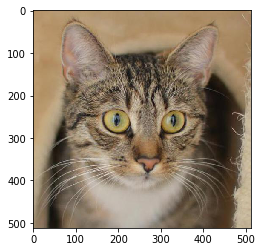

In [68]:
img_pred = cv2.imread('test_pictures/test_cat_pic_2.jpg')

print(plt.imshow(cv2.cvtColor(img_pred, cv2.COLOR_BGR2RGB)))

img_pred = cv2.resize(img_pred,(img_height_reload,img_width_reload))
img_pred = np.reshape(img_pred,[1,img_height,img_width,3])

classes = np.argmax(best_model.predict(img_pred), axis=-1)

print()
print('------------------------------------')
print('Predicted Class: ' + CATEGORIES[int(classes[0])])
print('------------------------------------')

AxesImage(54,36;334.8x217.44)

------------------------------------
Predicted Class: cats
------------------------------------


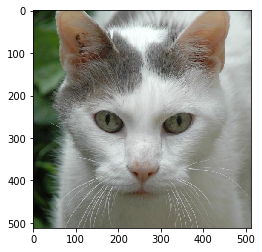

In [69]:
img_pred = cv2.imread('test_pictures/test_cat_pic_3.jpg')

print(plt.imshow(cv2.cvtColor(img_pred, cv2.COLOR_BGR2RGB)))

img_pred = cv2.resize(img_pred,(img_height_reload,img_width_reload))
img_pred = np.reshape(img_pred,[1,img_height,img_width,3])

classes = np.argmax(best_model.predict(img_pred), axis=-1)

print()
print('------------------------------------')
print('Predicted Class: ' + CATEGORIES[int(classes[0])])
print('------------------------------------')

AxesImage(54,36;334.8x217.44)

------------------------------------
Predicted Class: dogs
------------------------------------


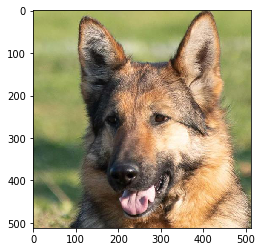

In [70]:
img_pred = cv2.imread('test_pictures/test_dog_pic_1.jpg')

print(plt.imshow(cv2.cvtColor(img_pred, cv2.COLOR_BGR2RGB)))

img_pred = cv2.resize(img_pred,(img_height_reload,img_width_reload))
img_pred = np.reshape(img_pred,[1,img_height,img_width,3])

classes = np.argmax(best_model.predict(img_pred), axis=-1)

print()
print('------------------------------------')
print('Predicted Class: ' + CATEGORIES[int(classes[0])])
print('------------------------------------')

AxesImage(54,36;334.8x217.44)

------------------------------------
Predicted Class: dogs
------------------------------------


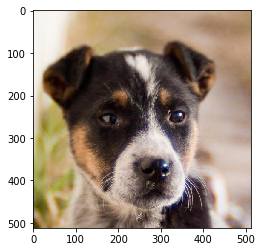

In [71]:
img_pred = cv2.imread('test_pictures/test_dog_pic_2.jpg')

print(plt.imshow(cv2.cvtColor(img_pred, cv2.COLOR_BGR2RGB)))

img_pred = cv2.resize(img_pred,(img_height_reload,img_width_reload))
img_pred = np.reshape(img_pred,[1,img_height,img_width,3])

classes = np.argmax(best_model.predict(img_pred), axis=-1)

print()
print('------------------------------------')
print('Predicted Class: ' + CATEGORIES[int(classes[0])])
print('------------------------------------')

AxesImage(54,36;334.8x217.44)

------------------------------------
Predicted Class: dogs
------------------------------------


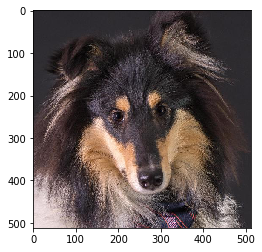

In [72]:
img_pred = cv2.imread('test_pictures/test_dog_pic_3.jpg')

print(plt.imshow(cv2.cvtColor(img_pred, cv2.COLOR_BGR2RGB)))

img_pred = cv2.resize(img_pred,(img_height_reload,img_width_reload))
img_pred = np.reshape(img_pred,[1,img_height,img_width,3])

classes = np.argmax(best_model.predict(img_pred), axis=-1)

print()
print('------------------------------------')
print('Predicted Class: ' + CATEGORIES[int(classes[0])])
print('------------------------------------')

AxesImage(54,36;334.8x217.44)

------------------------------------
Predicted Class: wilds
------------------------------------


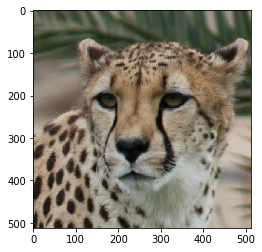

In [73]:
img_pred = cv2.imread('test_pictures/test_wild_pic_1.jpg')

print(plt.imshow(cv2.cvtColor(img_pred, cv2.COLOR_BGR2RGB)))

img_pred = cv2.resize(img_pred,(img_height_reload,img_width_reload))
img_pred = np.reshape(img_pred,[1,img_height,img_width,3])

classes = np.argmax(best_model.predict(img_pred), axis=-1)

print()
print('------------------------------------')
print('Predicted Class: ' + CATEGORIES[int(classes[0])])
print('------------------------------------')

AxesImage(54,36;334.8x217.44)

------------------------------------
Predicted Class: wilds
------------------------------------


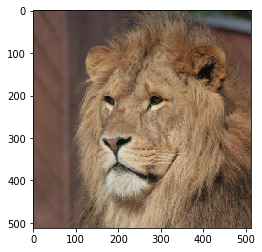

In [74]:
img_pred = cv2.imread('test_pictures/test_wild_pic_2.jpg')

print(plt.imshow(cv2.cvtColor(img_pred, cv2.COLOR_BGR2RGB)))

img_pred = cv2.resize(img_pred,(img_height_reload,img_width_reload))
img_pred = np.reshape(img_pred,[1,img_height,img_width,3])

classes = np.argmax(best_model.predict(img_pred), axis=-1)

print()
print('------------------------------------')
print('Predicted Class: ' + CATEGORIES[int(classes[0])])
print('------------------------------------')

AxesImage(54,36;334.8x217.44)

------------------------------------
Predicted Class: wilds
------------------------------------


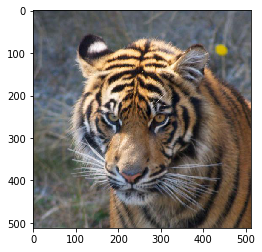

In [75]:
img_pred = cv2.imread('test_pictures/test_wild_pic_3.jpg')

print(plt.imshow(cv2.cvtColor(img_pred, cv2.COLOR_BGR2RGB)))

img_pred = cv2.resize(img_pred,(img_height_reload,img_width_reload))
img_pred = np.reshape(img_pred,[1,img_height,img_width,3])

classes = np.argmax(best_model.predict(img_pred), axis=-1)

print()
print('------------------------------------')
print('Predicted Class: ' + CATEGORIES[int(classes[0])])
print('------------------------------------')